# Project 9 - COVID19 (Dynamic)

In [1]:
#data analysis libraries 
import pandas as pd
import numpy as np
import datetime

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
covid = pd.read_csv('Data/covid19.csv')
covid

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [3]:
# Checking the shape of the columns
covid.shape

(58, 18)

In [4]:
# Checking the columns
covid.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [5]:
# Checking the datatypes of columns
covid.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

Observation:

    1. The dataset contains only 2 types of data types numeric & object

    2. The numeric data it consists of int and float and categorical is object
    
    3. The Last_Update is on object, need to convert it to Datetime

In [6]:
# Checking the information of the dataset

covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

Observation:

1. int and float are numeric and object is categorical

In [7]:
# Converting Object to DateTime

covid['Last_Update'] = pd.to_datetime(covid['Last_Update'])

## To check the missing values

In [8]:
covid.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

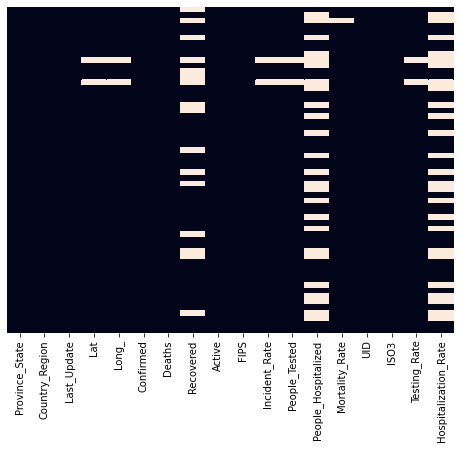

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(covid.isnull(), yticklabels=False, cbar=False)

Observation:

1. The summary shows that the some variables are categorial data types. So, I will impute the missing values with the most frequent values i.e. mode

2. Also, the variables are numeric contains missing values. These variables are numeric data types. So, I will impute the missing values with mean

## Impute values in Numeric Column

In [10]:
# Impute the missing value with mean

for i in ['Lat', 'Long_', 'Recovered', 'Incident_Rate', 'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'Testing_Rate', 'Hospitalization_Rate']:
    covid[i].fillna(covid[i].mean(), inplace=True)

Observation:

1. Now, all the missing values present in numeric columns are imputed

In [11]:
covid.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [12]:
# Sort according to the Last_Updated

covid.sort_values(by='Last_Update', inplace=True)

In [13]:
covid.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,USA,3353.942386,11.438860
31,Nebraska,US,2020-05-21 02:32:54,41.1254,-98.2681,11122,138,7007.428571,10984.0,31,574.956266,72135.0,4897.454545,1.240784,84000031,USA,3729.047853,14.342541
32,Nevada,US,2020-05-21 02:32:54,38.3135,-117.0554,7388,377,336.000000,6675.0,32,239.857981,91171.0,4897.454545,5.102870,84000032,USA,2959.947483,14.342541
33,New Hampshire,US,2020-05-21 02:32:54,43.4525,-71.5639,3868,190,1275.000000,2403.0,33,284.472215,50888.0,383.000000,4.912099,84000033,USA,3742.560000,9.901758
34,New Jersey,US,2020-05-21 02:32:54,40.2989,-74.5210,150776,10749,23945.000000,116082.0,34,1697.509285,531343.0,4897.454545,7.129119,84000034,USA,5982.117023,14.342541


In [14]:
## Droping Unwanted Columns

covid.drop('Country_Region', inplace=True, axis=1)

## Summary Statistics

In [15]:
covid.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.694329,48.873770,52562.031122,4084.750891,9901.304545,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,2.116191,2.378302e+07,1898.951207,3.781861
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.872800,-99.697700,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,8.400001e+07,2741.843521,12.829963
50%,38.978600,-86.797300,10148.500000,385.000000,4987.000000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,4.409323,8.400003e+07,3501.526835,14.342541
75%,42.214075,-77.072550,29395.500000,1394.250000,7007.428571,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,5.450908,8.400004e+07,4622.586404,15.552021
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


Observation:

1. Recovered min is 13 and max is 61886 people

2. death min is 0 and max is 28636 people

3. Confirmed min is 0 and max is 354370 people

4. For Confirmed, Deaths, Recovered, Long_, Active, FIPS, Incident_Rate, People_Tested, Testing_Rate  mean is greater than median therefore data is right skewd for these attriutes

## Correlation

In [16]:
covid.corr()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.278274,0.120391,0.119685,0.030196,0.119635,-0.000404,0.245693,0.084769,2.645628e-02,-0.134906,7.727677e-01,0.309579,-6.625465e-02
Long_,-0.278274,1.000000,0.009951,0.028690,-0.041588,0.011604,0.000396,0.041318,-0.077781,7.967739e-02,0.297192,-5.259975e-01,0.190191,7.138145e-02
Confirmed,0.120391,0.009951,1.000000,0.982191,0.822547,0.985218,-0.096696,0.708436,0.824136,8.692673e-01,0.382537,1.539717e-01,0.332464,2.874708e-01
Deaths,0.119685,0.028690,0.982191,1.000000,0.830223,0.954378,-0.075053,0.710105,0.739634,9.082786e-01,0.427127,1.200429e-01,0.344465,2.982254e-01
Recovered,0.030196,-0.041588,0.822547,0.830223,1.000000,0.725085,-0.000012,0.542795,0.711255,7.618294e-01,0.322160,1.303142e-01,0.220597,2.316917e-01
Active,0.119635,0.011604,0.985218,0.954378,0.725085,1.000000,-0.092276,0.700926,0.826144,8.359377e-01,0.367626,1.463538e-01,0.321395,2.845637e-01
FIPS,-0.000404,0.000396,-0.096696,-0.075053,-0.000012,-0.092276,1.000000,-0.000237,-0.000209,9.150251e-06,-0.262178,5.802216e-02,-0.000100,-1.176128e-04
Incident_Rate,0.245693,0.041318,0.708436,0.710105,0.542795,0.700926,-0.000237,1.000000,0.441669,5.510764e-01,0.353882,2.643102e-01,0.620621,1.960289e-01
People_Tested,0.084769,-0.077781,0.824136,0.739634,0.711255,0.826144,-0.000209,0.441669,1.000000,6.420913e-01,0.220200,2.356350e-01,0.230753,2.526802e-01
People_Hospitalized,0.026456,0.079677,0.869267,0.908279,0.761829,0.835938,0.000009,0.551076,0.642091,1.000000e+00,0.334335,6.697668e-09,0.270255,3.775863e-01


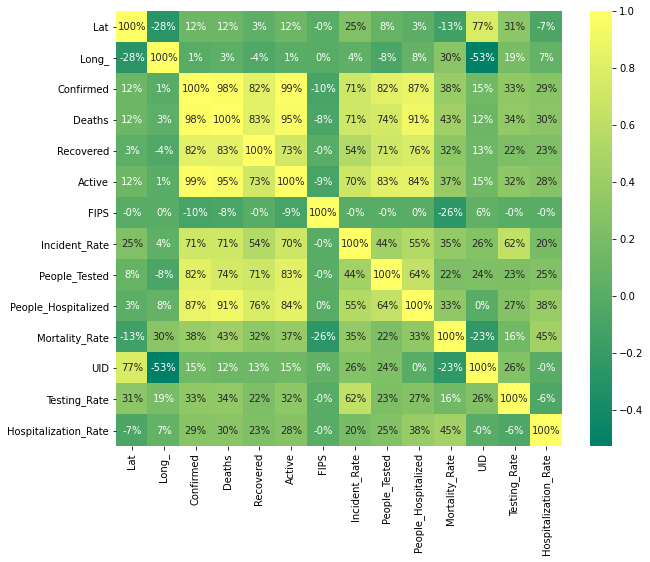

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(covid.corr(), annot=True, fmt='.0%', cmap='summer')

Text(0.5, 1.0, 'Correlation with Recovered variable')

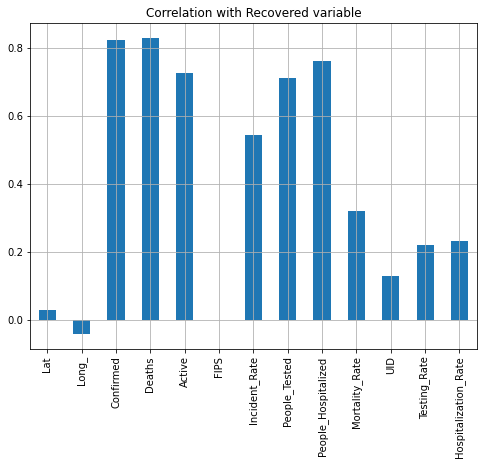

In [18]:
plt.figure(figsize=(8,6))
covid.drop('Recovered', axis=1).corrwith(covid['Recovered']).plot(kind='bar', grid=True)
plt.xticks(rotation=90)
plt.title('Correlation with Recovered variable')

Observation:
    
    1. Recovered is highly correlated with Deaths

    2. Long_ is negatively correlated with Recovered

Text(0.5, 1.0, 'Correlation with Deaths variable')

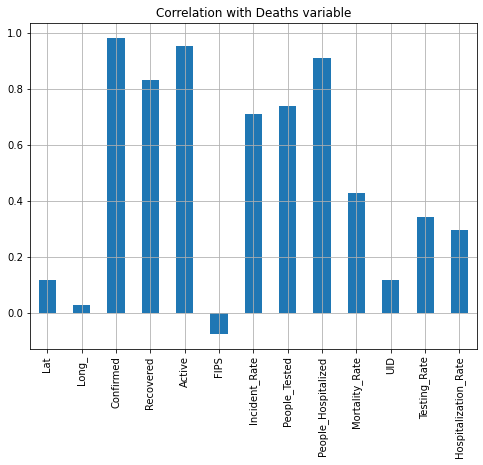

In [19]:
plt.figure(figsize=(8,6))
covid.drop('Deaths', axis=1).corrwith(covid['Deaths']).plot(kind='bar', grid=True)
plt.xticks(rotation=90)
plt.title('Correlation with Deaths variable')

Observation:

1. Confirmed is highly correlated with Deaths

2. FIPS is negatively correlated with Recovered

## Visualization

### Univarient Analysis

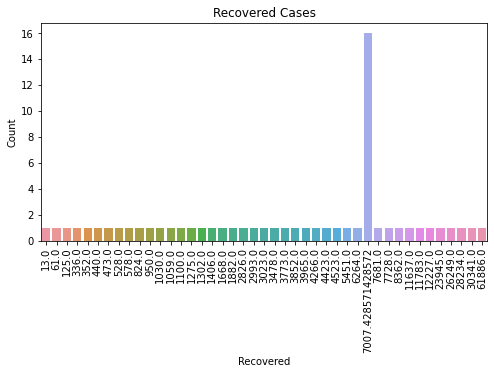

7007.428571     16
28234.000000     1
950.000000       1
7728.000000      1
7681.000000      1
1059.000000      1
6264.000000      1
3478.000000      1
3852.000000      1
352.000000       1
440.000000       1
61.000000        1
578.000000       1
824.000000       1
1030.000000      1
1406.000000      1
13.000000        1
1302.000000      1
1882.000000      1
1275.000000      1
4523.000000      1
1668.000000      1
11783.000000     1
3023.000000      1
30341.000000     1
8362.000000      1
5451.000000      1
2993.000000      1
26249.000000     1
11637.000000     1
3965.000000      1
3773.000000      1
4423.000000      1
473.000000       1
4266.000000      1
23945.000000     1
61886.000000     1
528.000000       1
125.000000       1
12227.000000     1
1100.000000      1
2826.000000      1
336.000000       1
Name: Recovered, dtype: int64


In [20]:
# Checkign the Recovered Cases

plt.subplots(figsize=(8,4))
sns.countplot(x='Recovered', data=covid)
plt.title('Recovered Cases')
plt.xlabel('Recovered')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

print(covid.Recovered.value_counts())

Observation: Recovered 7007 people in 16 cities

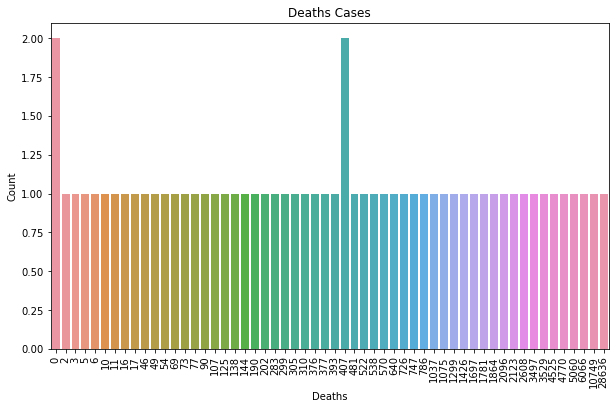

0        2
407      2
125      1
1299     1
46       1
4525     1
299      1
3497     1
144      1
4770     1
1697     1
2123     1
283      1
538      1
1426     1
377      1
17       1
16       1
1037     1
73       1
11       1
522      1
393      1
6        1
786      1
3        1
2        1
2096     1
305      1
6066     1
10749    1
376      1
2608     1
1781     1
747      1
310      1
481      1
28636    1
10       1
90       1
5        1
726      1
49       1
1075     1
77       1
138      1
202      1
3529     1
1864     1
69       1
5060     1
107      1
190      1
570      1
54       1
640      1
Name: Deaths, dtype: int64


In [21]:
# Checkign the Deaths Cases

plt.subplots(figsize=(10,6))
sns.countplot(x='Deaths', data=covid)
plt.title('Deaths Cases')
plt.xlabel('Deaths')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

print(covid.Deaths.value_counts())

Observation: 0 and 407 deaths in few cities i.e. 4 cities

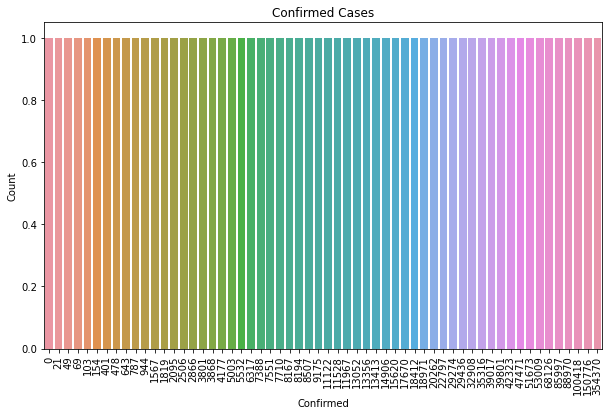

7551      1
154       1
8507      1
2866      1
49        1
944       1
2095      1
6317      1
13356     1
20262     1
1567      1
7710      1
3868      1
18971     1
21        1
29436     1
787       1
3801      1
401       1
22797     1
32908     1
5003      1
88970     1
11528     1
17670     1
15620     1
643       1
8194      1
14906     1
13052     1
11967     1
354370    1
39801     1
150776    1
35316     1
11122     1
8167      1
47471     1
85997     1
18412     1
39017     1
5532      1
103       1
13413     1
478       1
7388      1
100418    1
29274     1
51673     1
9175      1
1819      1
4177      1
42323     1
53009     1
68126     1
2506      1
69        1
0         1
Name: Confirmed, dtype: int64


In [22]:
# Checkign the Confirmed Casess

plt.subplots(figsize=(10,6))
sns.countplot(x='Confirmed', data=covid)
plt.title('Confirmed Cases')
plt.xlabel('Confirmed')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

print(covid.Confirmed.value_counts())

Observation: In most of the cities the confirmed cases are more than 1000 

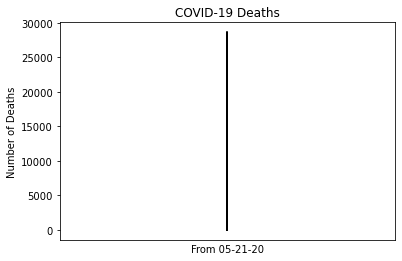

In [23]:
plt.plot(covid['Last_Update'], covid['Deaths'], color='black')
plt.title('COVID-19 Deaths')
plt.ylabel('Number of Deaths')
plt.xlabel('From 05-21-20')
plt.xticks([])
plt.show()

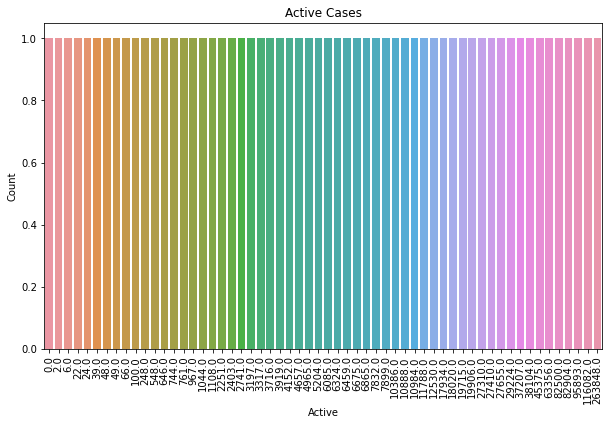

17934.0     1
49.0        1
82500.0     1
37207.0     1
82904.0     1
248.0       1
24.0        1
646.0       1
7832.0      1
761.0       1
48.0        1
4657.0      1
116082.0    1
100.0       1
1044.0      1
6459.0      1
0.0         1
39.0        1
3716.0      1
22.0        1
548.0       1
2.0         1
66.0        1
1108.0      1
967.0       1
6.0         1
744.0       1
4152.0      1
2741.0      1
18020.0     1
2251.0      1
3197.0      1
4965.0      1
45375.0     1
19715.0     1
3919.0      1
3317.0      1
6675.0      1
11788.0     1
27655.0     1
6865.0      1
27410.0     1
6085.0      1
263848.0    1
5204.0      1
29224.0     1
10888.0     1
38104.0     1
6324.0      1
2403.0      1
10984.0     1
19906.0     1
63356.0     1
10386.0     1
27310.0     1
7899.0      1
95893.0     1
12530.0     1
Name: Active, dtype: int64


In [24]:
# Checkign the Active Cases

plt.subplots(figsize=(10,6))
sns.countplot(x='Active', data=covid)
plt.title('Active Cases')
plt.xlabel('Active')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

print(covid.Active.value_counts())

Observation: In the most of the cities more than 10000 people are in active cases

### BiVarient Analysis

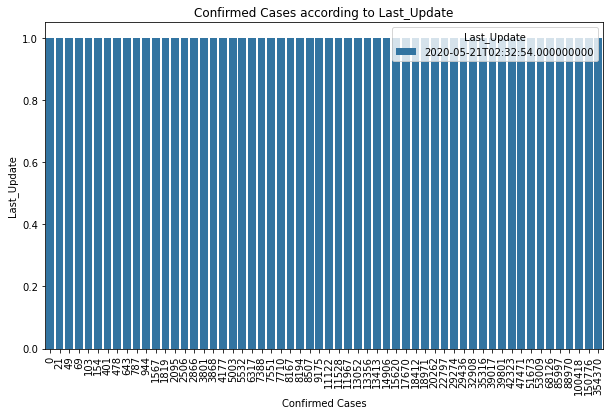

Confirmed  Last_Update        
0          2020-05-21 02:32:54    1
21         2020-05-21 02:32:54    1
49         2020-05-21 02:32:54    1
69         2020-05-21 02:32:54    1
103        2020-05-21 02:32:54    1
154        2020-05-21 02:32:54    1
401        2020-05-21 02:32:54    1
478        2020-05-21 02:32:54    1
643        2020-05-21 02:32:54    1
787        2020-05-21 02:32:54    1
944        2020-05-21 02:32:54    1
1567       2020-05-21 02:32:54    1
1819       2020-05-21 02:32:54    1
2095       2020-05-21 02:32:54    1
2506       2020-05-21 02:32:54    1
2866       2020-05-21 02:32:54    1
3801       2020-05-21 02:32:54    1
3868       2020-05-21 02:32:54    1
4177       2020-05-21 02:32:54    1
5003       2020-05-21 02:32:54    1
5532       2020-05-21 02:32:54    1
6317       2020-05-21 02:32:54    1
7388       2020-05-21 02:32:54    1
7551       2020-05-21 02:32:54    1
7710       2020-05-21 02:32:54    1
8167       2020-05-21 02:32:54    1
8194       2020-05-21 02:32:54   

In [25]:
plt.subplots(figsize=(10,6))
sns.countplot(x='Confirmed', hue='Last_Update', data=covid)
plt.title('Confirmed Cases according to Last_Update')
plt.xlabel('Confirmed Cases')
plt.xticks(rotation=90)
plt.ylabel('Last_Update')
plt.show()

print(covid.groupby('Confirmed')['Last_Update'].value_counts())

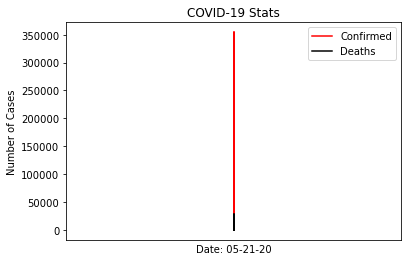

In [26]:
plt.plot(covid['Last_Update'], covid['Confirmed'], color='red', label='Confirmed')
plt.plot(covid['Last_Update'], covid['Deaths'], color ='black', label='Deaths')
plt.title('COVID-19 Stats')
plt.ylabel('Number of Cases')
plt.xlabel('Date: 05-21-20')
plt.legend()
plt.xticks([])
plt.show()

## Skewness

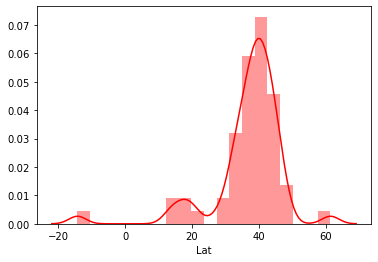

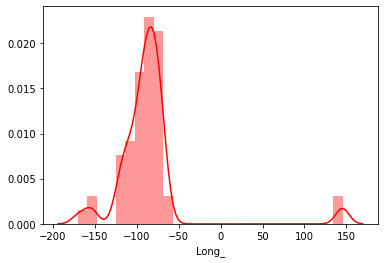

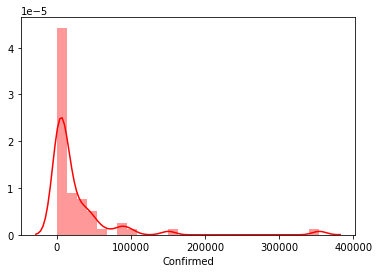

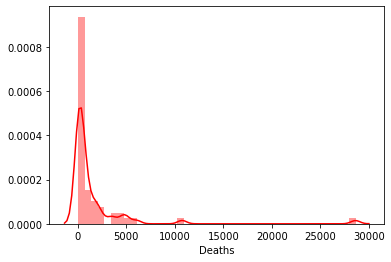

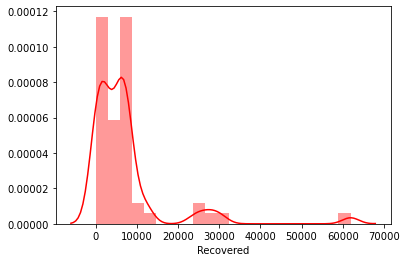

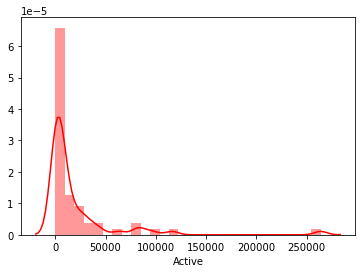

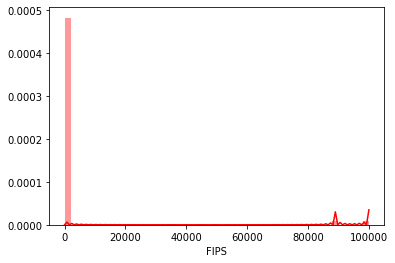

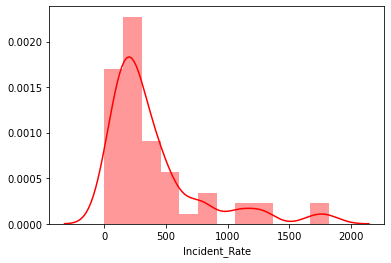

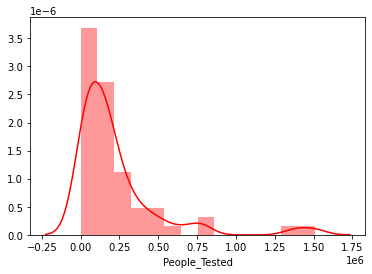

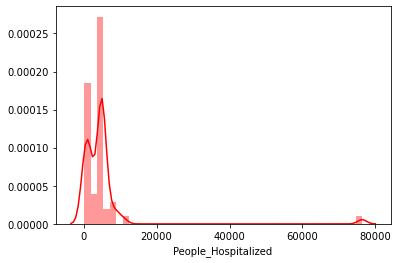

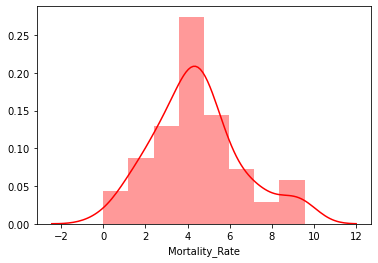

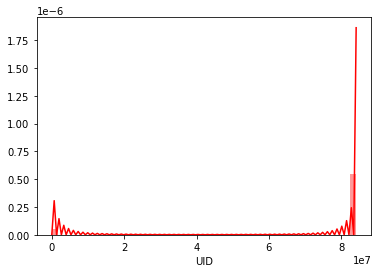

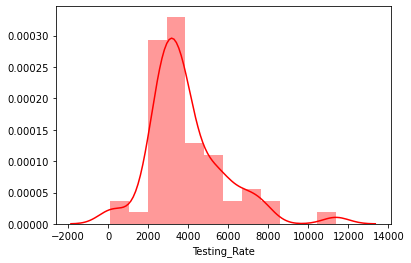

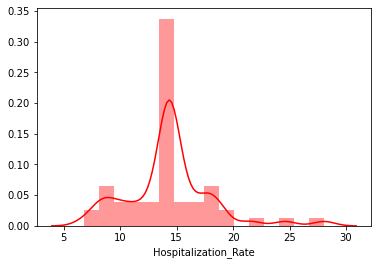

In [27]:
for i in covid.describe().columns:
    sns.distplot(covid[i], color='r')
    plt.show()

In [28]:
covid.skew()

Lat                    -2.250097
Long_                   3.567919
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
UID                    -3.027480
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

In [29]:
# Treating the Skewness via square root method

covid.skew()

for i in covid.skew().index:
    if i in covid.describe().columns:
        if covid[i].skew() > 0.55:
            covid[i] = np.sqrt(covid[i])
        if covid[i].skew() < -0.55:
            covid[i] = np.cbrt(covid[i])

In [30]:
covid.skew()

Lat                    -6.316456
Long_                        NaN
Confirmed               1.901107
Deaths                  2.496421
Recovered               1.431056
Active                  1.818910
FIPS                    5.237818
Incident_Rate           0.924150
People_Tested           1.182962
People_Hospitalized     3.148527
Mortality_Rate          0.496115
UID                    -3.027680
Testing_Rate           -0.261124
Hospitalization_Rate    0.211792
dtype: float64

In [31]:
# Dropping the Long_ from the Covid dataset

covid.drop('Long_', inplace=True, axis=1)

## Plotting Outliers

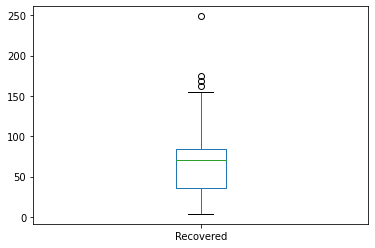

In [32]:
covid['Recovered'].plot.box()

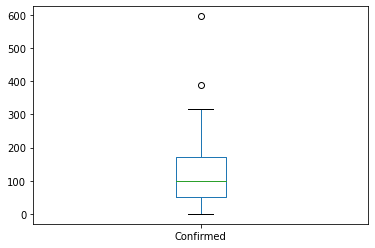

In [33]:
covid['Confirmed'].plot.box()

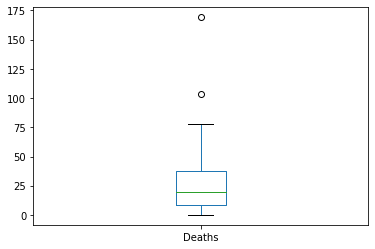

In [34]:
covid['Deaths'].plot.box()

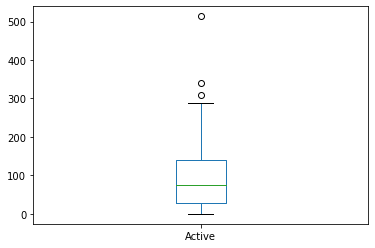

In [35]:
covid['Active'].plot.box()

In [36]:
# removing unwanted columns

covid.drop(['Last_Update', 'Province_State', 'ISO3'], inplace=True, axis=1)

## Removing the Outliers

In [37]:
from scipy.stats import zscore

z = np.abs(zscore(covid))
z

array([[5.95434673e-02, 9.29654060e-02, 1.65723943e-01, 2.90041995e-01,
        1.11201842e-01, 2.68659634e-01, 1.85359224e-01, 5.61394408e-03,
        5.39348860e-01, 2.18727182e-01, 3.07090457e-01, 1.63244684e-01,
        7.62849583e-01],
       [2.74036292e-01, 1.75443432e-01, 5.47442191e-01, 2.90041995e-01,
        3.94945088e-02, 1.85789704e-01, 6.99127901e-01, 5.41989431e-01,
        2.92274394e-01, 1.53368219e+00, 3.07090888e-01, 4.00215664e-02,
        6.48736552e-02],
       [1.73208598e-01, 3.58600266e-01, 2.83707135e-01, 1.16962688e+00,
        1.92769924e-01, 1.84173405e-01, 2.80945354e-01, 4.08569177e-01,
        2.92274394e-01, 3.07274479e-01, 3.07090903e-01, 3.89407701e-01,
        6.48736552e-02],
       [3.54057660e-01, 5.81687111e-01, 4.77401622e-01, 7.81673380e-01,
        5.21305884e-01, 1.82582170e-01, 1.21777596e-01, 7.13917924e-01,
        1.04531432e+00, 2.16339218e-01, 3.07090917e-01, 4.71482138e-02,
        1.24399779e+00],
       [2.44890015e-01, 2.48014670e+

In [38]:
threshold =3

print(np.where(z>3))

(array([ 6,  6,  6,  6,  6,  6,  9, 14, 14, 22, 31, 31, 34, 36, 38, 43, 56],
      dtype=int64), array([ 1,  2,  3,  4,  7,  8, 10, 10, 11, 10,  0, 10,  7, 12,  5,  5, 10],
      dtype=int64))


In [39]:
new_covid = covid[(z<3).all(axis=1)]

In [40]:
print(covid.shape, new_covid.shape)

(58, 13) (48, 13)


In [41]:
covid = new_covid

## Model Training 

In [42]:
# Splitting the data into input and output variables

x= covid.drop(columns=['Deaths'], axis=1)
y = covid['Deaths']

In [43]:
# Scaling in input variables

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x = ss.fit_transform(x)

In [44]:
# Breaking input & target variables

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=42)

In [45]:
# Importing model Library

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# Import Error Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
# Using model via for loop

model = [LinearRegression(), DecisionTreeRegressor(), KNeighborsRegressor(), SVR(), Lasso(), Ridge(), ElasticNet()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    m.fit(x_train, y_train)
    print('Score of %s Model is %s' % (m, m.score(x_train, y_train)))
    predm = m.predict(x_test)
    print('r2_score: %s \n' % (r2_score(y_test, predm)))
    print('\nBelow Errors of %s Model: ' % m)
    print('MAE: ', mean_absolute_error(y_test, predm))
    print('MSE : ', mean_squared_error(y_test, predm))
    print('RMSE : ', np.sqrt(mean_squared_error(y_test, predm)))


*************** LinearRegression() Model ***************

Score of LinearRegression() Model is 0.9921610337284693
r2_score: 0.9874597379106776 


Below Errors of LinearRegression() Model: 
MAE:  2.6997142764845496
MSE :  10.34163645517079
RMSE :  3.2158414847704777

*************** DecisionTreeRegressor() Model ***************

Score of DecisionTreeRegressor() Model is 1.0
r2_score: 0.6051545058376165 


Below Errors of DecisionTreeRegressor() Model: 
MAE:  10.459161386399034
MSE :  325.6190761807511
RMSE :  18.044918292437654

*************** KNeighborsRegressor() Model ***************

Score of KNeighborsRegressor() Model is 0.8864709138304252
r2_score: 0.7592166077578341 


Below Errors of KNeighborsRegressor() Model: 
MAE:  8.059194428917943
MSE :  198.5679636737031
RMSE :  14.0914145377142

*************** SVR() Model ***************

Score of SVR() Model is 0.15205700958287172
r2_score: -0.14081036110276512 


Below Errors of SVR() Model: 
MAE:  18.486666585506363
MSE :  940.797

In [47]:
# Cross Validation

from sklearn.model_selection import cross_val_score

model = [LinearRegression(), DecisionTreeRegressor(), KNeighborsRegressor(), SVR(), Lasso(), Ridge(), ElasticNet()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    cv_score = cross_val_score(m, x, y, cv=4, scoring = 'r2')
    print('Score of %s Model is %s' % (m, cv_score))
    print('Mean score: ', cv_score.mean())
    print('Std score : ', cv_score.std())
    print('Min score : ', cv_score.min())
    print('Max score : ', cv_score.max())


*************** LinearRegression() Model ***************

Score of LinearRegression() Model is [0.99041983 0.91245138 0.90982001 0.98083224]
Mean score:  0.9483808665122504
Std score :  0.037410673289229826
Min score :  0.9098200091579492
Max score :  0.9904198325230272

*************** DecisionTreeRegressor() Model ***************

Score of DecisionTreeRegressor() Model is [ 0.84116255 -2.33472191  0.86926271  0.41593291]
Mean score:  -0.05209093583526689
Std score :  1.3300606000430832
Min score :  -2.3347219084389863
Max score :  0.8692627088911864

*************** KNeighborsRegressor() Model ***************

Score of KNeighborsRegressor() Model is [0.66823067 0.73363729 0.7623375  0.73560525]
Mean score:  0.7249526748358525
Std score :  0.03465512287194602
Min score :  0.668230672096334
Max score :  0.7623374958228722

*************** SVR() Model ***************

Score of SVR() Model is [ 0.00463248  0.29339047  0.14551157 -0.20212483]
Mean score:  0.06035242308681926
Std score : 

Observation:

From above models, LinearRegression, Ridge gives the best results

We use the GridSearchCV to find the best parameters and check the score and after that we finalized our model

#### Using GridSearchCV to find the best Parameters in Linear REgression

In [48]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print('Score of %s Model is %s' % (lr, lr.score(x_train, y_train)))
predlr = lr.predict(x_test)
print('r2_score: %s \n' % (r2_score(y_test, predlr)))
print('\nBelow Errors of %s Model: ' % lr)
print('MAE: ', mean_absolute_error(y_test, predlr))
print('MSE : ', mean_squared_error(y_test, predlr))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, predlr)))

Score of LinearRegression() Model is 0.9921610337284693
r2_score: 0.9874597379106776 


Below Errors of LinearRegression() Model: 
MAE:  2.6997142764845496
MSE :  10.34163645517079
RMSE :  3.2158414847704777


In [49]:
score = cross_val_score(lr, x, y, cv=5, scoring = 'r2')
print('Score is %s' % score)
print('Mean score: ', score.mean())
print('Std score : ', score.std())
print('Min score : ', score.min())
print('Max score : ', score.max())

Score is [0.99019467 0.97092439 0.9227686  0.96214478 0.98849939]
Mean score:  0.9669063676003594
Std score :  0.02447677906629632
Min score :  0.9227685997979866
Max score :  0.9901946696583629


#### Using GridSearchCV to find the best Parameters in Ridge

In [50]:
# Ridge model will give the best parameters using GridSearchCV

from sklearn.model_selection import GridSearchCV

ridge = Ridge()
param = {'alpha': [0.001, 0.01, 0.1, 1], 'random_state':range(1,50)}
clf = GridSearchCV(ridge, param)
clf.fit(x, y)
clf.best_params_

{'alpha': 0.001, 'random_state': 1}

In [51]:
# using Ridge model with best results

ridge = Ridge(alpha=0.001, random_state=1)
ridge.fit(x_train, y_train)

print('Score is %s' % ridge.score(x_train, y_train))
predrd = ridge.predict(x_test)
print('r2_score: %s' % (r2_score(y_test, predrd)))
print('\nBelow Errors ')
print('MAE: ', mean_absolute_error(y_test, predrd))
print('MSE : ', mean_squared_error(y_test, predrd))
print('RMSE : ', np.sqrt(mean_squared_error(y_test, predrd)))

Score is 0.9921609097311309
r2_score: 0.9874422105662574

Below Errors 
MAE:  2.7031475063047887
MSE :  10.35609081208358
RMSE :  3.2180880677948482


In [52]:
score = cross_val_score(ridge, x, y, cv=5, scoring = 'r2')
print('Score is %s' % score)
print('Mean score: ', score.mean())
print('Std score : ', score.std())
print('Min score : ', score.min())
print('Max score : ', score.max())

Score is [0.99016349 0.97097822 0.92211858 0.9621888  0.98847856]
Mean score:  0.9667855321449418
Std score :  0.024702070404172046
Min score :  0.9221185849518945
Max score :  0.9901634934144968


## Using Ensemble Technique to Boostup our Score

In [53]:
# Using RandomForest and AdaBoost

model = [RandomForestRegressor(), AdaBoostRegressor()]
for m in model:
    print('\n*************** %s Model ***************\n' % m)
    m.fit(x_train, y_train)
    print('Score: ', m.score(x_train, y_train))
    predm = m.predict(x_test)
    print('r2_score: %s' % (r2_score(y_test, predm)))
    print('\nBelow Errors ')
    print('MAE: ', mean_absolute_error(y_test, predm))
    print('MSE : ', mean_squared_error(y_test, predm))
    print('RMSE : ', np.sqrt(mean_squared_error(y_test, predm)))


*************** RandomForestRegressor() Model ***************

Score:  0.9808880536718544
r2_score: 0.751908197055298

Below Errors 
MAE:  8.79983749610045
MSE :  204.59502483178386
RMSE :  14.30367172553201

*************** AdaBoostRegressor() Model ***************

Score:  0.9946164542270046
r2_score: 0.8423377411589213

Below Errors 
MAE:  6.690217417183971
MSE :  130.02007071477274
RMSE :  11.40263437608927


Observation:

1. Well as we can see the RMSE is lower in the LinearREgression and Ridge model, so the Linear Regression is the best model in this case
2. LinearRegression is working well beacuse it gives the best r2_score and also it is not suffering from overfitting and Underfitting

In [54]:
# Saving the predicted value to .csv

prediction = pd.DataFrame(predlr, columns=['Predictions']).to_csv('Data/Predicted_covid.csv')
prediction

In [55]:
# Saving RandomForestRegressor

import joblib
joblib.dump(lr, 'lr_covid.pkl')

['lr_covid.pkl']

## Conclusion:

I gone through analysis which model will be work with better r2_score with the help of low residual and RMSE scores.

We can see that there is a huge r2_score Better when we use the LinearRegression Model

We tried a Grid Search then using the Regularization Method i.e. Ridge, to find the best Hyperprarameters!

Here, our Hyperparamter Tuning was more focussed on Getting a Better r2 Score! -> 98.7% overall